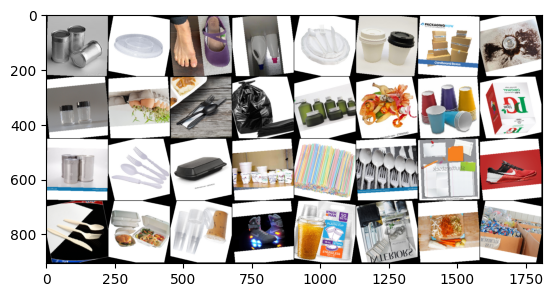

In [8]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from custom_data_loader import ImageLoader
from config import Config
import matplotlib.pyplot as plt
import numpy as np

BATCH_SIZE: int = 64
EPOCHS: int = 20
LEARNING_RATE: float = 0.001
BATCH_NORM_MEAN: list[float] = [0.485, 0.456, 0.406]
BATCH_NORM_STD: list[float] = [0.229, 0.224, 0.225]
DATA_TRANSFORMS: dict = {
    "train": transforms.Compose(
        [
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomVerticalFlip(p=0.2),
            transforms.RandomRotation(degrees=15),
            transforms.ToTensor(),
            # transforms.Normalize(
            #     mean=BATCH_NORM_MEAN,
            #     std=BATCH_NORM_STD,
            # ),
        ]
    ),
    "validation": transforms.Compose(
        [
            transforms.Resize((256, 256)),
            transforms.ToTensor(),
            transforms.Normalize(mean=BATCH_NORM_MEAN, std=BATCH_NORM_STD),
        ]
    ),
    "test": transforms.Compose(
        [
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=BATCH_NORM_MEAN, std=BATCH_NORM_STD),
        ]
    ),
}
train_loader = DataLoader(
    ImageLoader(
        path=Config.DATA_BASE_DIR,
        data_transform=DATA_TRANSFORMS["train"],
        split="train",
    ),
    batch_size=32,
    shuffle=True,
    num_workers=4,
)


# Function to display images
def imshow(img, title=None):
    # img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title is not None:
        plt.title(title)
    plt.show()


# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Display images
imshow(torchvision.utils.make_grid(images))
